Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* I'm glad to say that you executed your project really well.
* You're really killing it in this course. It was a pleasure to review your project.
* You've mastered your first project in CV. Congratulations!
* Nothing can stop you now. Good luck next!

## Initialization

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


## EDA

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<div class="alert alert-block alert-success">
<b>Success:</b> Great that you've remembered about initial analysis of the uploaded file.
</div>

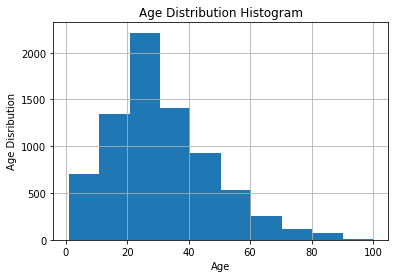

In [4]:
plt.hist(labels['real_age'], bins = 10)
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram")
plt.grid()
plt.show()

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if the number of bins were increased.
</div>

50


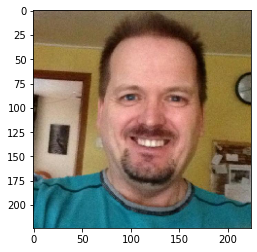

12


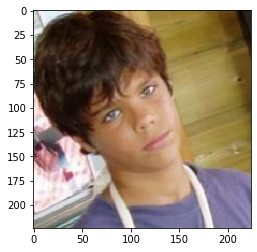

43


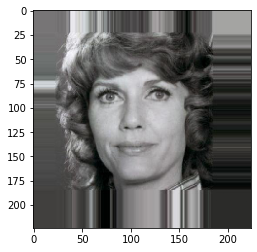

40


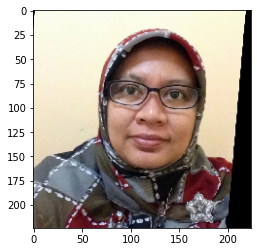

8


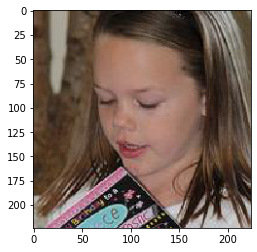

4


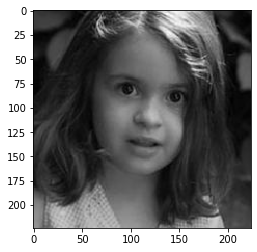

46


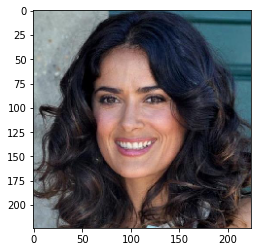

55


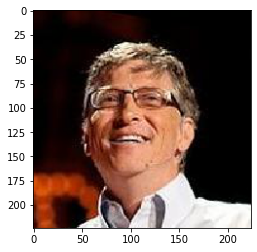

44


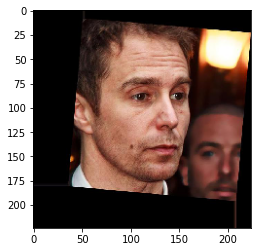

32


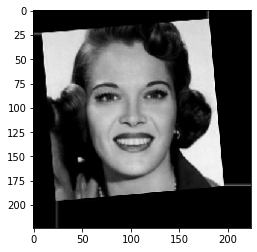

In [5]:
for i in range(10):
    img, label = train_gen_flow.next()
    plt.imshow(img[i])
    print(label[i])
    plt.show()

<div class="alert alert-block alert-success">
<b>Success:</b> Great that ages were inserted!
</div>

### Findings

The EDA above indicates that there the majority of the photos included in the dataset are of those between 15-40 years old with very few images of those >60 years. This could cause the model to detect very young and very old ages with a lower degree of accuracy due to the sparsity of data.

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [6]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

labels = pd.read_csv('/datasets/faces/labels.csv')


In [7]:
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """

    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25,
                                       horizontal_flip=True,
                                       brightness_range=[1.0, 1.2],
                                       zoom_range=[0.5,1.0],
                                       rescale = 1./255)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow


In [8]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25, rescale = 1./255)

    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


In [9]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    
    optimizer = Adam(lr = 0.0001)
    backbone = (ResNet50(input_shape=input_shape,
                         classes=1000,
                         include_top=False,
                         weights='imagenet'))
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units = 1, activation = 'relu'))

    model.compile(
        loss='mse', optimizer=optimizer, metrics=['mae']
    )

    return model


In [10]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model


## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [11]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')
        

### Output

2022-08-18 16:20:11.967832: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2022-08-18 16:20:11.969614: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2022-08-18 16:20:13.066976: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-08-18 16:20:13.736543: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-08-18 16:20:13.736635: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-08-18 16:20:13.736668: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-08-18 16:20:13.738632: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-08-18 16:20:13.739073: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-08-18 16:20:13.741333: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-08-18 16:20:13.742531: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-08-18 16:20:13.742601: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-08-18 16:20:13.747057: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-08-18 16:20:13.747414: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-08-18 16:20:13.754031: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2100000000 Hz
2022-08-18 16:20:13.754583: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5a37380 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-08-18 16:20:13.754611: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-08-18 16:20:13.902425: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x53465f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-08-18 16:20:13.902468: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2022-08-18 16:20:13.904826: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-08-18 16:20:13.904884: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-08-18 16:20:13.904895: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-08-18 16:20:13.904922: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-08-18 16:20:13.904932: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-08-18 16:20:13.904941: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-08-18 16:20:13.904950: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-08-18 16:20:13.904957: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-08-18 16:20:13.909394: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-08-18 16:20:13.909460: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-08-18 16:20:14.230029: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-08-18 16:20:14.230088: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2022-08-18 16:20:14.230097: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2022-08-18 16:20:14.234661: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-08-18 16:20:14.234710: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 8s
   98304/94765736 [..............................] - ETA: 52s
  540672/94765736 [..............................] - ETA: 18s
 2162688/94765736 [..............................] - ETA: 6s 
 4202496/94765736 [>.............................] - ETA: 5s
 6660096/94765736 [=>............................] - ETA: 4s
 8396800/94765736 [=>............................] - ETA: 5s
10985472/94765736 [==>...........................] - ETA: 4s
12591104/94765736 [==>...........................] - ETA: 4s
15294464/94765736 [===>..........................] - ETA: 4s
16785408/94765736 [====>.........................] - ETA: 4s
19603456/94765736 [=====>........................] - ETA: 4s
19914752/94765736 [=====>........................] - ETA: 4s
20979712/94765736 [=====>........................] - ETA: 4s
22355968/94765736 [======>.......................] - ETA: 4s
23748608/94765736 [======>.......................] - ETA: 4s
25141248/94765736 [======>.......................] - ETA: 4s
25174016/94765736 [======>.......................] - ETA: 5s
26550272/94765736 [=======>......................] - ETA: 4s
27942912/94765736 [=======>......................] - ETA: 4s
29335552/94765736 [========>.....................] - ETA: 4s
29368320/94765736 [========>.....................] - ETA: 5s
30744576/94765736 [========>.....................] - ETA: 4s
32137216/94765736 [=========>....................] - ETA: 4s
33529856/94765736 [=========>....................] - ETA: 4s
33562624/94765736 [=========>....................] - ETA: 4s
34938880/94765736 [==========>...................] - ETA: 4s
36331520/94765736 [==========>...................] - ETA: 4s
37724160/94765736 [==========>...................] - ETA: 4s
37756928/94765736 [==========>...................] - ETA: 4s
39149568/94765736 [===========>..................] - ETA: 4s
40542208/94765736 [===========>..................] - ETA: 4s
41951232/94765736 [============>.................] - ETA: 4s
43343872/94765736 [============>.................] - ETA: 4s
44752896/94765736 [=============>................] - ETA: 4s
46145536/94765736 [=============>................] - ETA: 4s
47554560/94765736 [==============>...............] - ETA: 3s
48979968/94765736 [==============>...............] - ETA: 3s
50339840/94765736 [==============>...............] - ETA: 3s
51765248/94765736 [===============>..............] - ETA: 3s
53190656/94765736 [===============>..............] - ETA: 3s
54534144/94765736 [================>.............] - ETA: 3s
55975936/94765736 [================>.............] - ETA: 3s
57417728/94765736 [=================>............] - ETA: 3s
58728448/94765736 [=================>............] - ETA: 3s
60186624/94765736 [==================>...........] - ETA: 2s
61644800/94765736 [==================>...........] - ETA: 2s
62922752/94765736 [==================>...........] - ETA: 2s
64397312/94765736 [===================>..........] - ETA: 2s
65871872/94765736 [===================>..........] - ETA: 2s
67117056/94765736 [====================>.........] - ETA: 2s
68591616/94765736 [====================>.........] - ETA: 2s
70098944/94765736 [=====================>........] - ETA: 2s
71311360/94765736 [=====================>........] - ETA: 1s
72802304/94765736 [======================>.......] - ETA: 1s
74326016/94765736 [======================>.......] - ETA: 1s
75505664/94765736 [======================>.......] - ETA: 1s
77012992/94765736 [=======================>......] - ETA: 1s
78553088/94765736 [=======================>......] - ETA: 1s
79699968/94765736 [========================>.....] - ETA: 1s
81223680/94765736 [========================>.....] - ETA: 1s
82763776/94765736 [=========================>....] - ETA: 1s
83894272/94765736 [=========================>....] - ETA: 0s
85434368/94765736 [==========================>...] - ETA: 0s
86990848/94765736 [==========================>...] - ETA: 0s
88088576/94765736 [==========================>...] - ETA: 0s
89645056/94765736 [===========================>..] - ETA: 0s
91201536/94765736 [===========================>..] - ETA: 0s
92282880/94765736 [============================>.] - ETA: 0s
93855744/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 8s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/20
2022-08-18 16:20:33.280833: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-08-18 16:20:33.578480: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 107s - loss: 227.4906 - mae: 10.9638 - val_loss: 283.1932 - val_mae: 12.8359
Epoch 2/20
356/356 - 99s - loss: 108.4331 - mae: 7.8546 - val_loss: 194.3531 - val_mae: 10.8898
Epoch 3/20
356/356 - 102s - loss: 88.4728 - mae: 7.1293 - val_loss: 168.3634 - val_mae: 10.2543
Epoch 4/20
356/356 - 104s - loss: 75.0276 - mae: 6.5755 - val_loss: 83.1590 - val_mae: 6.9356
Epoch 5/20
356/356 - 112s - loss: 64.4149 - mae: 6.1562 - val_loss: 87.8755 - val_mae: 6.9079
Epoch 6/20
356/356 - 105s - loss: 57.5151 - mae: 5.8247 - val_loss: 178.4306 - val_mae: 10.4627
Epoch 7/20
356/356 - 104s - loss: 52.5319 - mae: 5.5286 - val_loss: 110.1060 - val_mae: 7.7549
Epoch 8/20
356/356 - 99s - loss: 49.7816 - mae: 5.3894 - val_loss: 79.6017 - val_mae: 6.6366
Epoch 9/20
356/356 - 99s - loss: 39.8713 - mae: 4.8406 - val_loss: 80.8827 - val_mae: 6.8438
Epoch 10/20
356/356 - 104s - loss: 35.8238 - mae: 4.5995 - val_loss: 81.4256 - val_mae: 6.7268
Epoch 11/20
356/356 - 106s - loss: 32.7205 - mae: 4.4016 - val_loss: 108.1778 - val_mae: 7.8571
Epoch 12/20
356/356 - 102s - loss: 30.2157 - mae: 4.2486 - val_loss: 79.1899 - val_mae: 6.5387
Epoch 13/20
356/356 - 102s - loss: 27.7450 - mae: 4.0640 - val_loss: 84.6558 - val_mae: 6.5771
Epoch 14/20
356/356 - 98s - loss: 26.7088 - mae: 3.9844 - val_loss: 75.5785 - val_mae: 6.5852
Epoch 15/20
356/356 - 99s - loss: 23.7859 - mae: 3.7297 - val_loss: 81.2186 - val_mae: 6.4918
Epoch 16/20
356/356 - 99s - loss: 24.5621 - mae: 3.8254 - val_loss: 78.7294 - val_mae: 6.6805
Epoch 17/20
356/356 - 99s - loss: 22.4881 - mae: 3.6264 - val_loss: 78.7752 - val_mae: 6.5391
Epoch 18/20
356/356 - 99s - loss: 20.7182 - mae: 3.4865 - val_loss: 77.7415 - val_mae: 6.5972
Epoch 19/20
356/356 - 99s - loss: 20.8812 - mae: 3.5021 - val_loss: 94.9975 - val_mae: 7.2670
Epoch 20/20
356/356 - 99s - loss: 19.0343 - mae: 3.3466 - val_loss: 71.2355 - val_mae: 6.4012
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 71.2355 - mae: 6.4012
Test MAE: 6.4012

<div class="alert alert-block alert-success">
<b>Success:</b> Model was defined correctly. Glad to see that augmentation was applied only to train set.
</div>

## Conclusions

The results of the model training show that the model is able to predict age with an average error of 6.4 years. Although this may be helpful to the customer, Good Seed, in minimizing time spent identifying individuals to sell alcohol to, it may not be helpful in their goal to identify the age of their customers to better adhere to alcohol laws. This is because I would argue that there is a possibility that it may actually end up allowing more underaged people to purchase alcohol since it can cause an individual to be categorized as 6.4 years older on average. A better method of age verification may be a model that can identify a person's age based on their ID and attempt to verify that they are the person that appears on the photo of their ID through computer vision.

However, there may be some applications that the model in question could be helpful for. A significant one would be for collecting data on identifying what kinds of products certain age ranges are more likely to shop for which can help the store target their products to specific age groups. It may also be helpful for determining when certain age groups like to shop to help make decisions about how products are promoted at the store.

<div class="alert alert-block alert-success">
<b>Success:</b> Final analysis was done very well! Great that you've added your thoughts about application of the model!
</div>

# Checklist

- [X]  Notebook was opened
- [X]  The code is error free
- [X]  The cells with code have been arranged by order of execution
- [X]  The exploratory data analysis has been performed
- [X]  The results of the exploratory data analysis are presented in the final notebook
- [X]  The model's MAE score is not higher than 8
- [X]  The model training code has been copied to the final notebook
- [X]  The model training output has been copied to the final notebook
- [X]  The findings have been provided based on the results of the model training